In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Importing the basic libraries needed

In [2]:
data = pd.read_excel(r"C:\Users\Lenovo\Desktop\DS\Project\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


Opne and read the data
## Data Explanation
Here we have been provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. We would be having a new dataset to predict the prices of flight tickets using this dataset as training dataset

- There are 10683 rows and 11 columns for prediction

Target
- Price

Labels
- Airline
- Date_of_Journey
- Source
- Destination
- Route
- Dep_Time
- Arrival_Time
- Duration
- Total_Stops
- Additional_Info

# Exploratory Data Analysis
### Identification of variables and data types

In [3]:
data.shape

(10683, 11)

Shape of the data set has 10683 rows and 11 columns

## Checking data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- There are 2 Nan values present in 
    - Route
    - Total_stops
- 10 columns are of object type whch has to be encoded:
    - Airline
    - Date_of_Journey
    - Source
    - Destination
    - Route
    - Dep_Time
    - Arrival_Time
    - Duration
    - Total_Stops
    - Additional_Info

In [5]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

- Date_of_Journey,Dep_Time,Arrival_Time are not necessary in calculating the price of the flight
- Also check for additional info if anything is avalilable

In [6]:
data = data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis = 1)

## Check the unique values of object type data

In [7]:
print(data['Airline'].nunique())
print(data['Source'].nunique())
print(data['Destination'].nunique())
print(data['Route'].nunique())
print(data['Duration'].nunique())
print(data['Total_Stops'].nunique())
print(data['Additional_Info'].nunique())

12
5
6
128
368
5
10


Encode all these values

In [8]:
print(data['Additional_Info'].unique())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


Thre are 10 different additional_info data. So, use it and avoid deleting it

## Treating NaN values

In [9]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since there is only 2 NaN values present, do not treat it, remove it to avoid biased solution

In [10]:
data = data.dropna(axis = 0)

Dropped the NaN values

In [11]:
data.shape

(10682, 8)

Only 1 row has the NaN value which is in both the column
   - Route
   - Total_stops

## Visualisation of categorical variable

In [12]:
class_data = data[['Airline','Source','Destination','Total_Stops','Additional_Info','Route','Duration']]

<function matplotlib.pyplot.show(close=None, block=None)>

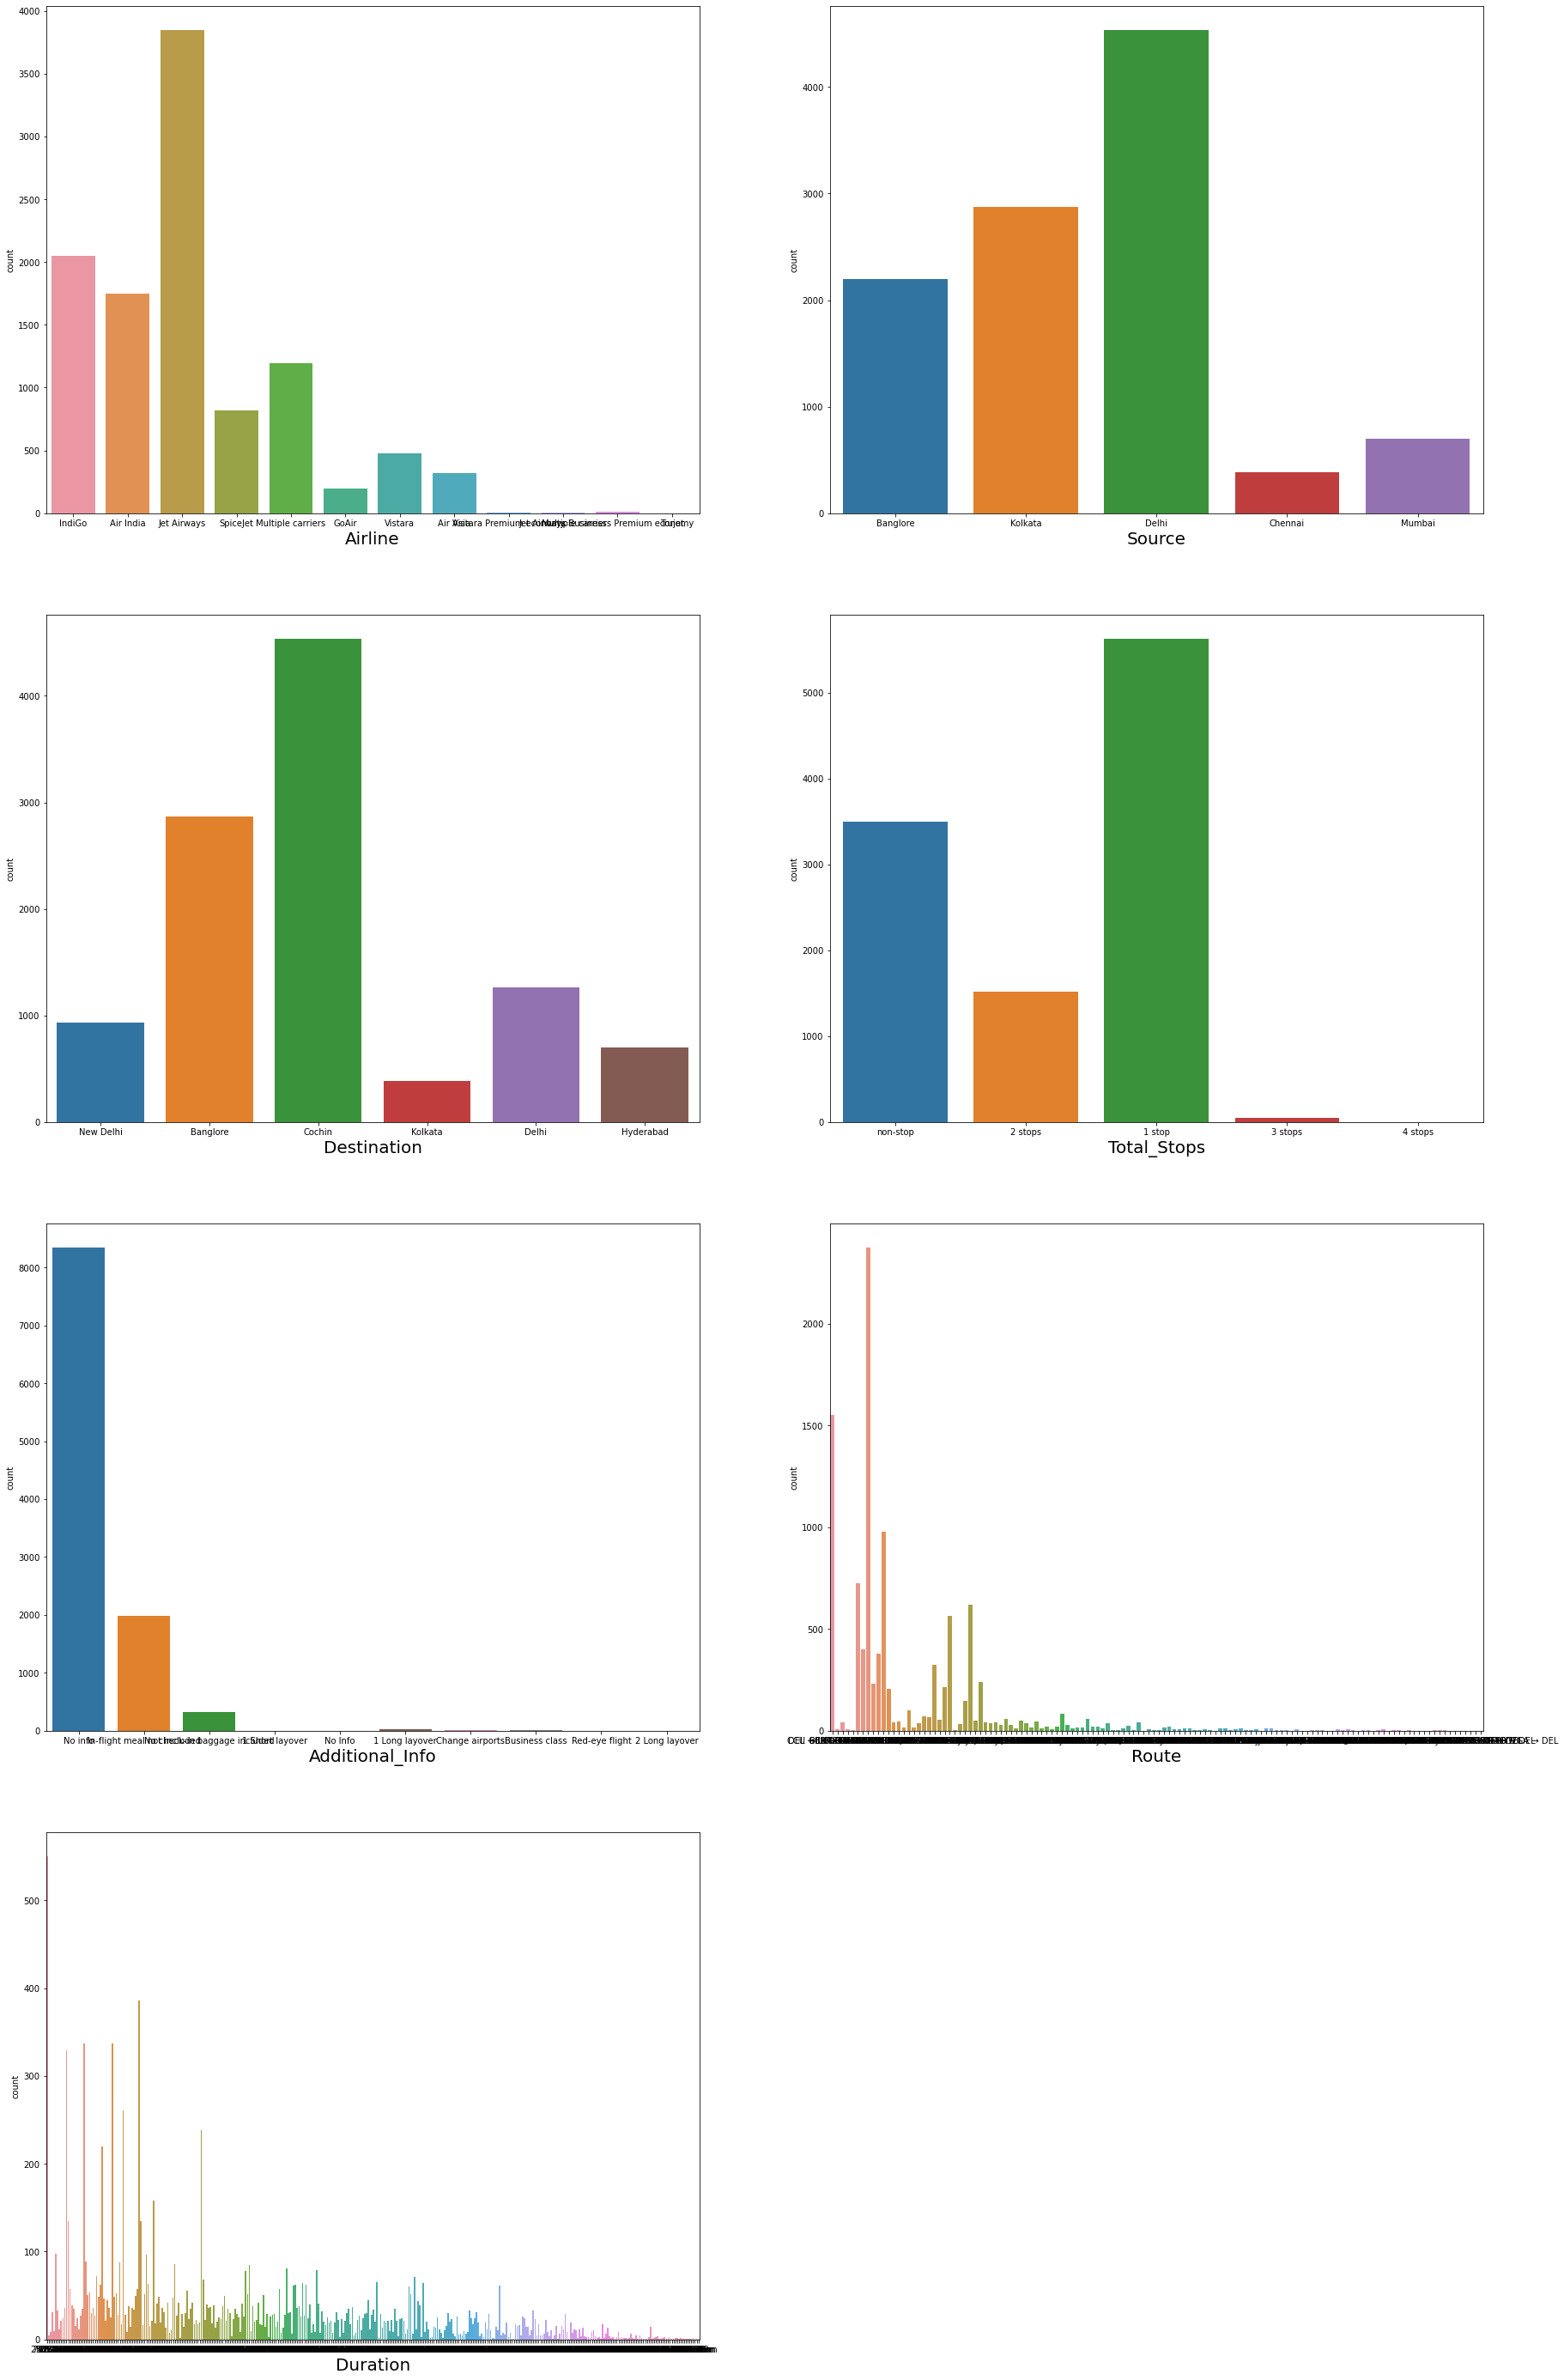

In [13]:
plt.figure(figsize = (30,50), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <=8:
        ax =  plt.subplot(4,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Jet airways has the highest number data available in the dataset
- Souce- Delhi is the highest
- Destination- Cochin is the highest
- 1stop flight data is more compared to others
- No-info is more in Additional-info column
- There are various routes where certain routes are more and certain are less in number
- Same way for duration, certain has high data, certain has lower data
## Visualisation of Continuous variable

In [14]:
continuous_data = data.drop(['Airline','Source','Destination','Total_Stops','Additional_Info','Route','Duration'],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

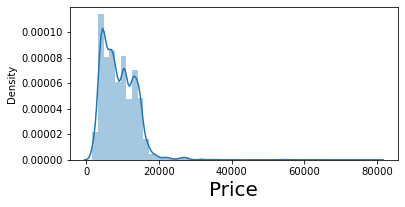

In [15]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=45:
        ax =  plt.subplot(15,3,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

The curve is standardised but with skewness

## Encoding

In [16]:
df = pd.read_excel(r"C:\Users\Lenovo\Desktop\DS\Project\Flight_Ticket_Participant_Datasets\Test_set.xlsx")
df.shape

(2671, 10)

Load the predicting data and know the shape

In [17]:
df = df.drop(['Date_of_Journey','Dep_Time','Arrival_Time'], axis = 1)

Dropped the columns which are not available in training dataset

In [18]:
z = pd.DataFrame()
z = data.copy()

In [19]:
z = z[['Airline','Source','Destination','Total_Stops','Additional_Info','Route','Duration']]

Removing price to encode the data because the predicting dataset does not have price

In [20]:
w = data['Price']

Assigning a variable to price

In [21]:
daf = pd.concat([z,df],axis=0)

Concat the predicting data and training data to 

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [23]:
for i in daf.columns:
    if daf[i].dtypes =='object':
        daf[i] = enc.fit_transform(daf[i].values.reshape(-1,1))
daf

,Airline,Source,Destination,Total_Stops,Additional_Info,Route,Duration
0,3.0,0.0,5.0,4.0,8.0,18.0,242.0
1,1.0,3.0,0.0,1.0,8.0,87.0,342.0
2,4.0,2.0,1.0,1.0,8.0,122.0,106.0
3,3.0,3.0,0.0,0.0,8.0,95.0,317.0
4,3.0,0.0,5.0,0.0,8.0,29.0,309.0
...,...,...,...,...,...,...,...
2666,1.0,3.0,0.0,0.0,8.0,76.0,168.0
2667,3.0,3.0,0.0,4.0,8.0,67.0,239.0
2668,4.0,2.0,1.0,0.0,8.0,108.0,332.0
2669,1.0,2.0,1.0,0.0,8.0,108.0,62.0


Data is encoded using ordinal encoder

In [24]:
data = daf.iloc[:10682,:]
df = daf.iloc[10683:,:]

Thus the training data and predicitng data are encoded

In [25]:
pri = pd.Series(w)
data['Price'] = pri.values

Adding Price to the dataset

## Describing the data after encoding

In [26]:
data.describe()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route,Duration,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,1.458248,7.392998,77.553548,196.396087,9087.214567
std,2.352090,1.177276,1.474845,1.806320,1.214254,38.249250,110.701411,4611.548810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,2.000000,0.000000,0.000000,8.000000,49.000000,106.000000,5277.000000
50%,4.000000,2.000000,1.000000,0.000000,8.000000,76.000000,235.000000,8372.000000
75%,4.000000,3.000000,2.000000,4.000000,8.000000,108.000000,284.000000,12373.000000
max,11.000000,4.000000,5.000000,4.000000,9.000000,131.000000,373.000000,79512.000000


The data looks good but has to be standardised before fitting into a model
## Correlation

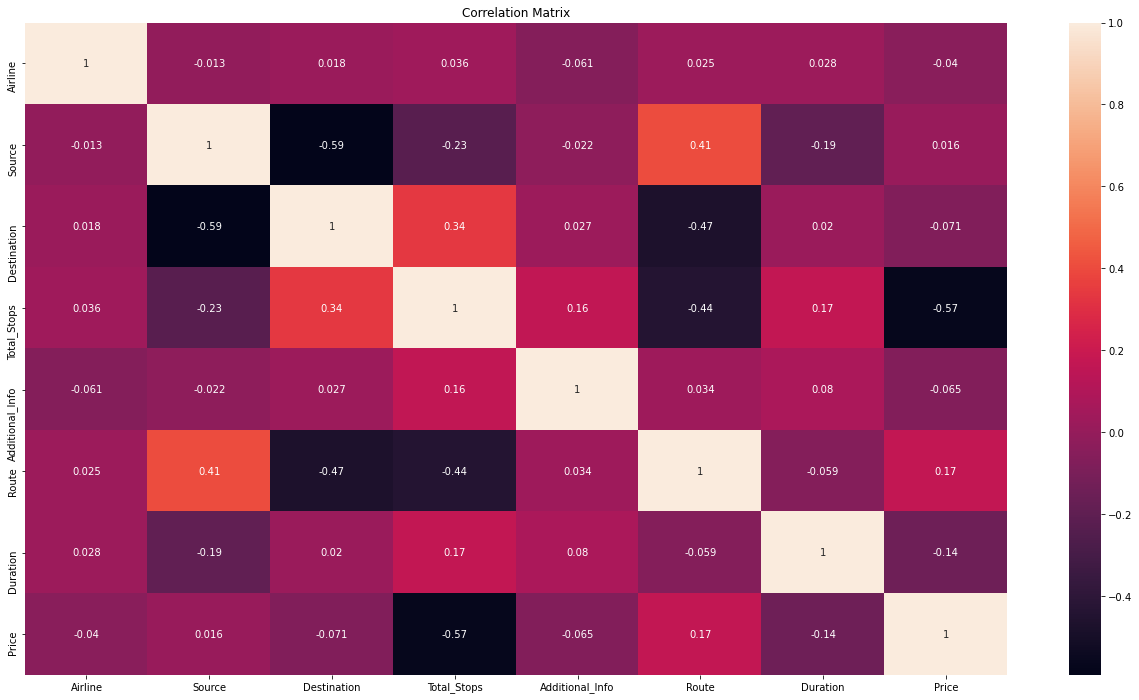

In [27]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

There is no strong correlation is found

## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

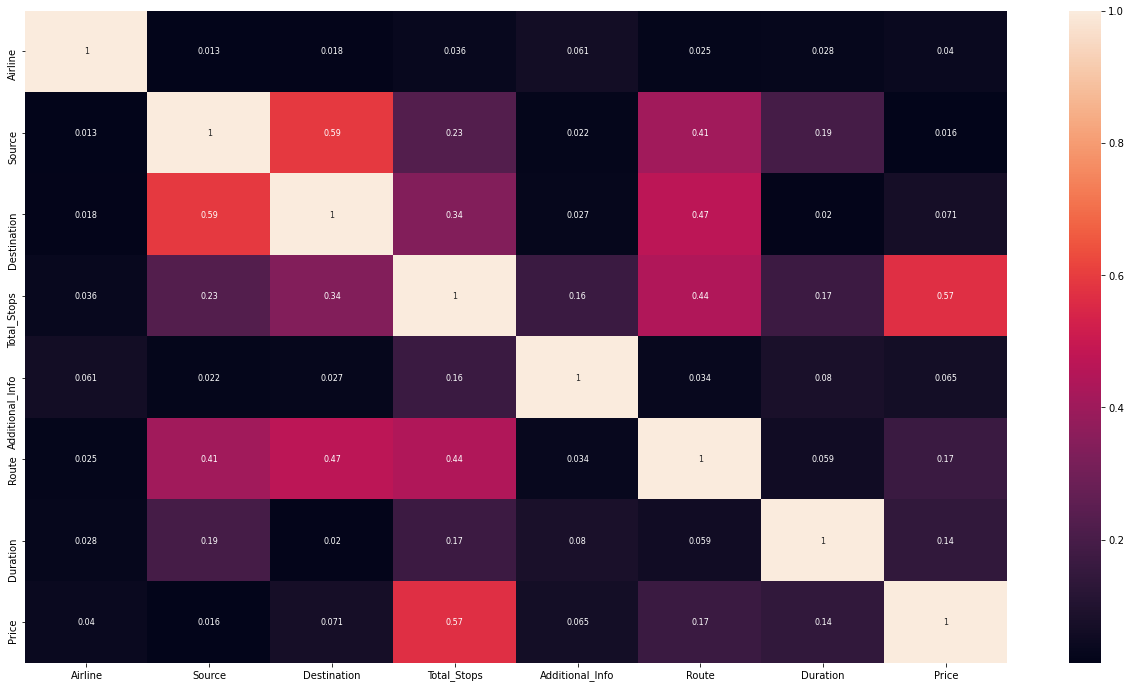

In [28]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is no high collinearity is find between the variables

## Treat Skewness

In [29]:
x = data.drop('Price',axis=1)
y = data['Price']

In [30]:
x.skew()
x.skew().sort_values()

Additional_Info   -1.779689
Route             -0.521644
Source            -0.424023
Duration          -0.196254
Total_Stops        0.631532
Airline            0.731057
Destination        1.244046
dtype: float64

There is no high level of skewness present in the data

## Treat Outliers

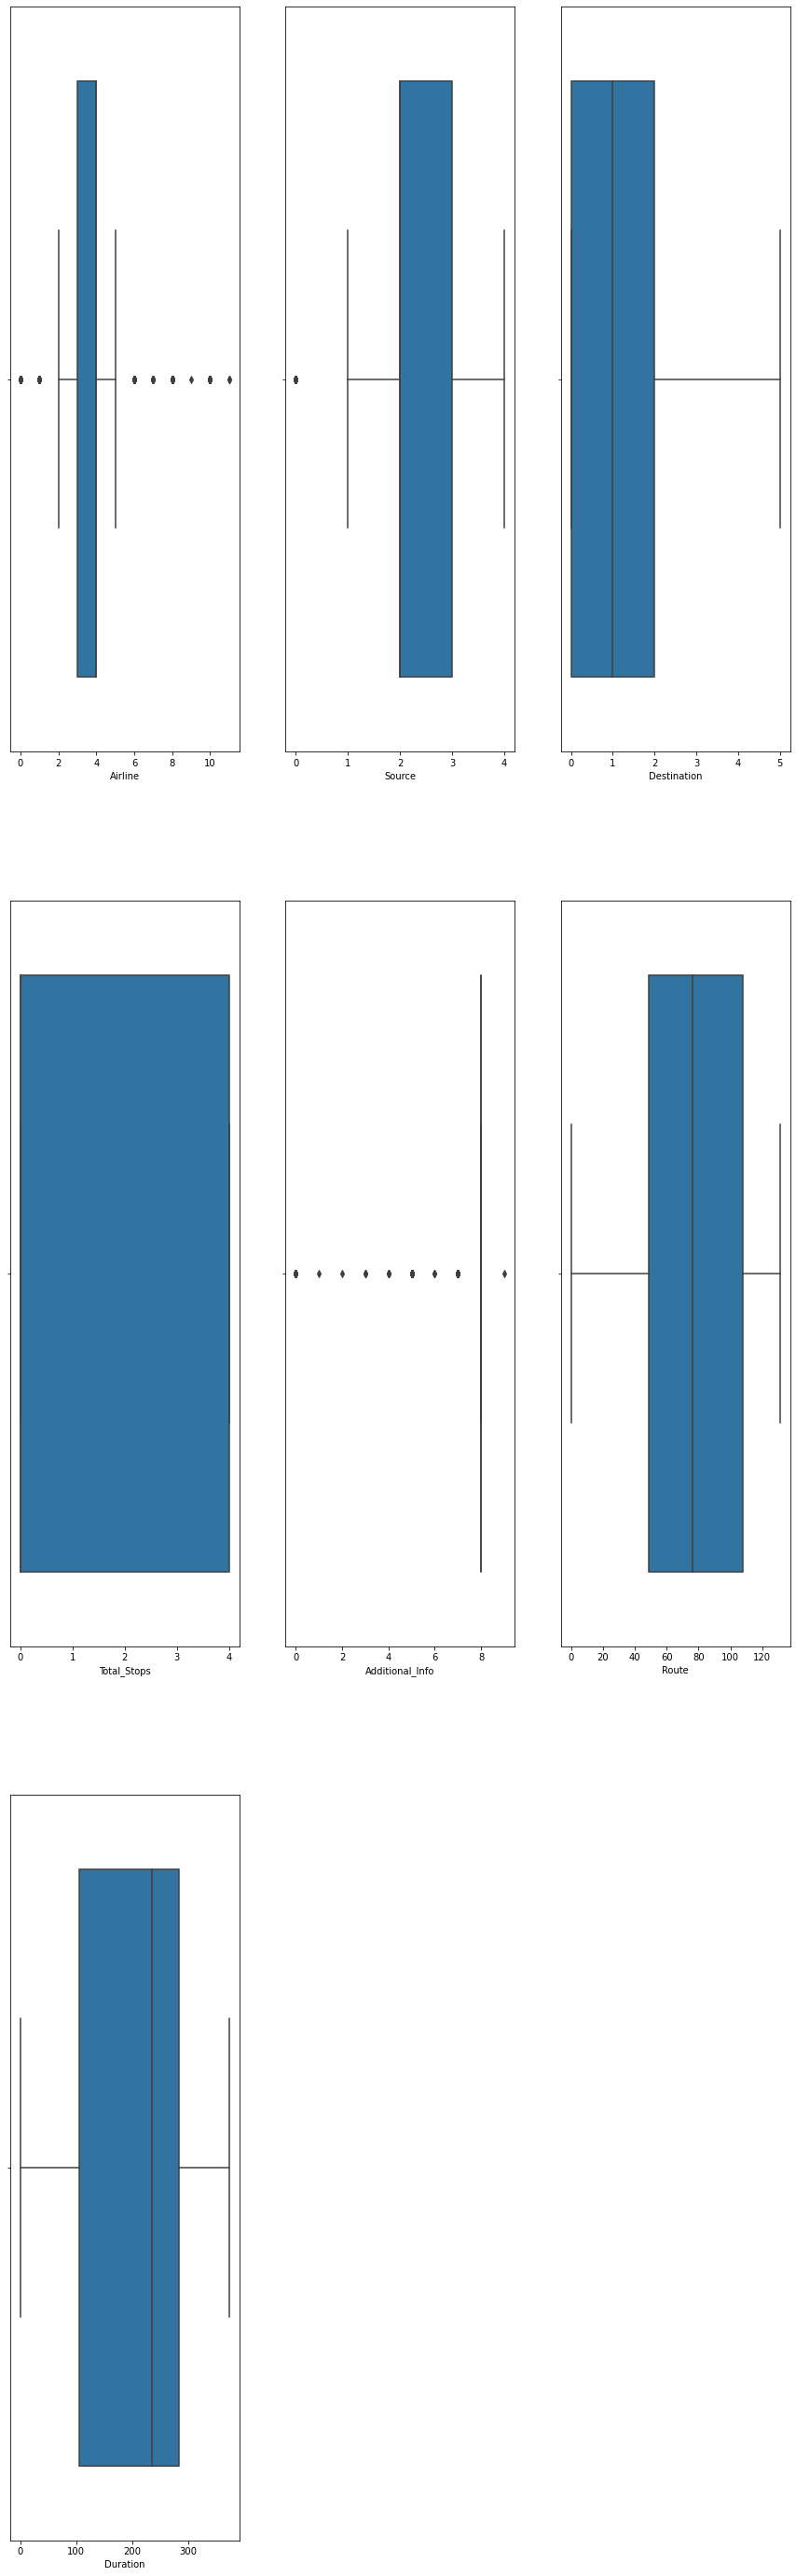

In [31]:
plt.figure(figsize=(15,50))
graph = 1
for column in x:
    if graph<=9:
        ax = plt.subplot(3,3,graph)
        sns.boxplot(x[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

There is outliers in 
- Airline
- Source
- Additional_info

## Quantify

In [32]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [33]:
data['Airline_zscore'] = zscore(data['Airline'])
data['is_outlier'] = data['Airline_zscore'].apply(lambda x: x<=-3 or x>=3)
data['Source_zscore'] = zscore(data['Source'])
data['is_outlier'] = data['Source_zscore'].apply(lambda x: x<=-3 or x>=3)
data['Additional_Info_zscore'] = zscore(data['Additional_Info'])
data['is_outlier'] = data['Additional_Info_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

,Airline,Source,Destination,Total_Stops,Additional_Info,Route,Duration,Price,Airline_zscore,is_outlier,Source_zscore,Additional_Info_zscore
785,1.0,0.0,5.0,1.0,1.0,4.0,54.0,26743,-1.261152,True,-1.658359,-5.265207
1043,1.0,0.0,5.0,0.0,0.0,15.0,358.0,14594,-1.261152,True,-1.658359,-6.088796
2079,1.0,0.0,5.0,0.0,0.0,0.0,123.0,14752,-1.261152,True,-1.658359,-6.088796
2405,4.0,0.0,5.0,0.0,0.0,5.0,89.0,22270,0.014369,True,-1.658359,-6.088796
2481,1.0,0.0,5.0,0.0,0.0,0.0,162.0,12599,-1.261152,True,-1.658359,-6.088796
2495,4.0,0.0,5.0,0.0,0.0,5.0,56.0,26890,0.014369,True,-1.658359,-6.088796
2556,4.0,0.0,5.0,0.0,0.0,5.0,88.0,25735,0.014369,True,-1.658359,-6.088796
2924,5.0,0.0,5.0,0.0,3.0,5.0,320.0,79512,0.439542,True,-1.658359,-3.618027
3032,4.0,0.0,5.0,0.0,3.0,2.0,331.0,28097,0.014369,True,-1.658359,-3.618027
3111,4.0,0.0,5.0,0.0,0.0,5.0,369.0,27992,0.014369,True,-1.658359,-6.088796


In [34]:
data = data.drop([785,1043,2079,2405,2481,2495,2556,2924,3032,3111,3700,3788,4521,5013,5372,5628,6024,6336,6576,7724,8957,9019,9657,10364,10511],axis = 0)

Removed outliers. Check for data loss

In [35]:
data.shape

(10657, 12)

In [36]:
Data_loss = ((10682-10657)/10682)*100
Data_loss

0.23403856955626287

Data loss is less than 1%, which is accpetable. Because, working with outliers will not give good accuracy

# Model Building

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

Import necessary librares needed for model building

## Standardisation

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

Data is standardised

## Finding best random state

In [39]:
regression = LinearRegression()
maxreg = 0 
maxrs = 0
for i in range(1,300):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxreg:
        maxreg = acc
        maxrs = i
print('Best regression score is:',maxreg,'on Random State',maxrs)

Best regression score is: 0.40536791728258503 on Random State 163


In [40]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.20,random_state=163)

## Linear Regression

In [41]:
LR = LinearRegression()
LR.fit(x_train,y_train)
lr = LR.score(x_test,y_test)
print('Regression Score:',lr)

y_pred = LR.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.40536791728258503
Mean Absolute Error: 2536.9113267816006
Mean Squared Error: 10955330.550568596


## Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dtt = dt.score(x_test,y_test)
print('Regression Score:',dtt)

y_pred = dt.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.6858621460986918
Mean Absolute Error: 1392.3118602510547
Mean Squared Error: 5787585.5137310885


## Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_ = rfr.score(x_test,y_test)
print('Regression Score:',rfr_)

y_pred = rfr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:',mae)

mse = mean_squared_error(y_test,y_pred)
print('Mean Squared Error:',mse)

Regression Score: 0.7175264661063236
Mean Absolute Error: 1356.8119651550307
Mean Squared Error: 5204211.184587392


Random Forest Regressor is the best model for this dataset with Regression score is 71

## Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=5)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=5)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rfr,x,y,cv=5)
print('RFR cvs:',sc2.mean())

LR cvs: 0.35015984339366646
DT cvs: 0.6684877334662096
RFR cvs: 0.7224004547931149


The cross validation score shows that Random Forest Regrssor is neither underfitting nor overfitting the model.

- Regression score = 0.71
- CV Score = 0.72

So, continue with hyper parameter tuning.

## Hyper parameter Tuning

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

Import necessary libraries needed for hyperparameter tuning

In [46]:
params = {'n_estimators': [40,47,49,50], 'learning_rate':[0.30,0.40,0.45],'loss' : ['exponential'],'random_state' : [163]} 
rnd_search = RandomizedSearchCV (AdaBoostRegressor(), cv = 5, param_distributions = params,n_iter = 10,n_jobs=1)
print(rnd_search.fit(x_train,y_train))
print('Best Estimator:', rnd_search.best_estimator_)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=1,
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'loss': ['exponential'],
                                        'n_estimators': [40, 47, 49, 50],
                                        'random_state': [163]})
Best Estimator: AdaBoostRegressor(learning_rate=0.3, loss='exponential', n_estimators=40,
                  random_state=163)


Check the best estimator and imply it

In [47]:
from sklearn import metrics

ada = AdaBoostRegressor(loss='exponential',learning_rate=0.3,n_estimators=47,random_state=163)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)

print('Accuracy post tuning')
print(metrics.r2_score(y_test,y_pred))

Accuracy post tuning
0.24954681045707383


Accuracy post tuning the parameters is 0.25. Since this is low compared to Random Forest Regressor score, use the actual rfr and save the model

## Save the model

In [48]:
import pickle
filename = 'Flight_Price.pkl'
pickle.dump(rfr,open(filename,'wb'))

Thus the model is saved

## Basic necessities for predicting model

In [49]:
loaded_model=pickle.load(open('Flight_Price.pkl','rb'))
result = loaded_model.predict(df)
result

array([11604.74369824, 11481.97386491, 11604.74369824, ...,
       11604.74369824, 23541.37818182, 11604.74369824])

Load the model and find the result

In [50]:
result = pd.DataFrame(result, columns = ['Predicted'])

Convert the numpy array into dataframe

In [51]:
actual = pd.read_excel(r"C:\Users\Lenovo\Desktop\DS\Project\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx")
actual

,Original
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


Load the actual answer given 

In [52]:
conclusion = pd.concat([result,actual],axis=1)
conclusion

,Predicted,Original
0,11604.743698,15998
1,11481.973865,16612
2,11604.743698,25572
3,11604.743698,25778
4,8932.671105,16934
...,...,...
2666,23374.775682,14046
2667,6757.951521,14086
2668,11604.743698,22720
2669,23541.378182,23544


Thus created a dataframe having the predicted and original values